In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

Transfer Learning
=====================


What dataset to use?
----------------

We decided to use the [Oxford-IIIT Pet Dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/).

However we weren't shure we wanted to use the Dataset as is.
There where three options we thought about:
1. Use the full Dataset
2. Only use the Dogs or Cats of the dataset to reduce the number of labels.
3. Only categorise the data by Dog or Cat and not by breed.


We aslo want to resize the Images when loading them to 224x224 Pixels



In [2]:
IMG_SIZE = 224

Option 1: The full dataset

In [ ]:
# %%script false  #disable this cell. it is no longer needed

# # Download the Oxford-IIIT Pet Dataset
# fulldataset_trainval = datasets.OxfordIIITPet(root='./data', split='trainval', target_types='category', download=True, transform=transforms.Resize((IMG_SIZE, IMG_SIZE)))
# fulldataset_test = datasets.OxfordIIITPet(root='./data', split='test', target_types='category', download=True, transform=transforms.Resize((IMG_SIZE, IMG_SIZE)))
# fullClasses = fulldataset_trainval.classes

# # Print the dataset and number of samples in train and test
# print("Train dataset:", fulldataset_trainval)
# print("Test dataset:", fulldataset_test)
# print("Number of classes:", len(fullClasses))

Option 2: Only Dogs

In [3]:
dogClasses = [1,2,3,4,8,10,12,13,14,15,16,17,18,19,21,22,24,25,28,29,30,31,34,35,36]

In [ ]:
# %%script false  #disable this cell. it is no longer needed

# import os
# import shutil


# print("Dog classes:", np.array(fullClasses)[dogClasses])
# print("Number of dog classes:", len(dogClasses))
# #It is verry comlpicated to delete entries from an existing dataset. It is easyer to create a new dataset with the desired entries.
# # Create the target directory if it doesn't exist
# target_dir = './data_without_cats'
# os.makedirs(target_dir, exist_ok=True)
# os.makedirs(target_dir+'/oxford-iiit-pet', exist_ok=True)
# os.makedirs(target_dir+'/oxford-iiit-pet/images', exist_ok=True)
# os.makedirs(target_dir+'/oxford-iiit-pet/annotations', exist_ok=True)

# #clear the annotation files
# open(target_dir+'/oxford-iiit-pet/annotations/trainval.txt', 'w').close()
# open(target_dir+'/oxford-iiit-pet/annotations/test.txt', 'w').close()


# # Get the list of dog image filenames
# with open('./data/oxford-iiit-pet/annotations/trainval.txt') as f:
#     lines = f.readlines()
#     for line in lines:
#         filename, class_id, *_ = line.strip().split()
#         class_id = int(class_id)-1
#         if class_id in dogClasses:
#             shutil.copy('./data/oxford-iiit-pet/images/' + filename + '.jpg', target_dir+'/oxford-iiit-pet/images/' + filename + '.jpg')
#             with open(target_dir+'/oxford-iiit-pet/annotations/trainval.txt', 'a') as f:
#                 f.write(line)

# with open('./data/oxford-iiit-pet/annotations/test.txt') as f:
#     lines = f.readlines()
#     for line in lines:
#         filename, class_id, *_ = line.strip().split()
#         class_id = int(class_id)
#         if class_id in dogClasses:
#             shutil.copy('./data/oxford-iiit-pet/images/' + filename + '.jpg', target_dir+'/oxford-iiit-pet/images/' + filename + '.jpg')
#             with open(target_dir+'/oxford-iiit-pet/annotations/test.txt', 'a') as f:
#                 f.write(line)


# dogdataset_trainval = datasets.OxfordIIITPet(root='./data_without_cats', split='trainval', target_types='category', download=False, transform=transforms.Resize((IMG_SIZE, IMG_SIZE)))
# dogdataset_test = datasets.OxfordIIITPet(root='./data_without_cats', split='test', target_types='category', download=False, transform=transforms.Resize((IMG_SIZE, IMG_SIZE)))

# #Print the dataset and number of samples in train and test
# print("Train dataset:", dogdataset_trainval)
# print("Test dataset:", dogdataset_test)

# #TODO would be to remove the classes that are not dogs from the classes list and update the classes in the dataset to not have gaps in the class ids

Option 3: categorize by cat or dog

In [4]:
# Transformation for training
train_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),  # Resize images
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Transformation for visualization
visualize_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE))  # Only resize images
])

In [5]:
#Transform the label of the Oxford-IIIT Pet Dataset to be 0 for dogs and 1 for cats
coddataset_trainval = datasets.OxfordIIITPet(root='./data', split='trainval', target_types='category', download=True,
                                  transform=train_transform, target_transform=lambda x: 0 if x in dogClasses else 1)
coddataset_test = datasets.OxfordIIITPet(root='./data', split='test', target_types='category', download=True,
                                 transform=train_transform, target_transform=lambda x: 0 if x in dogClasses else 1)
visualize_coddataset_trainval = datasets.OxfordIIITPet(root='./data', split='trainval', target_types='category', download=True,
                                            transform=visualize_transform, target_transform=lambda x: 0 if x in dogClasses else 1)
codclasses = ['dog', 'cat']

#Print the dataset and number of samples in train and test
print("Train dataset:", coddataset_trainval)
print("Test dataset:", coddataset_test)

100%|██████████| 791918971/791918971 [11:13<00:00, 1176675.90it/s]


Extracting data/oxford-iiit-pet/images.tar.gz to data/oxford-iiit-pet


100%|██████████| 19173078/19173078 [00:17<00:00, 1088146.24it/s]


Extracting data/oxford-iiit-pet/annotations.tar.gz to data/oxford-iiit-pet
Train dataset: Dataset OxfordIIITPet
    Number of datapoints: 3680
    Root location: ./data
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
Target transform: <function <lambda> at 0x7f44df37feb0>
Test dataset: Dataset OxfordIIITPet
    Number of datapoints: 3669
    Root location: ./data
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
Target transform: <function <lambda> at 0x7f44f85cf6d0>


In [6]:
# Build the custom function to display image and label name
def view_n_random_image(ds,classes,N=5):
    fig = plt.figure(figsize=(20, 4*int(np.ceil(N/5))))
    for i in range(N):
        idx = np.random.randint(len(ds))
        image, label = ds[idx]
        ax = fig.add_subplot(int(np.ceil(N/5)), 5, i+1, xticks=[], yticks=[])
        ax.imshow(image)
        ax.set_title(classes[label])

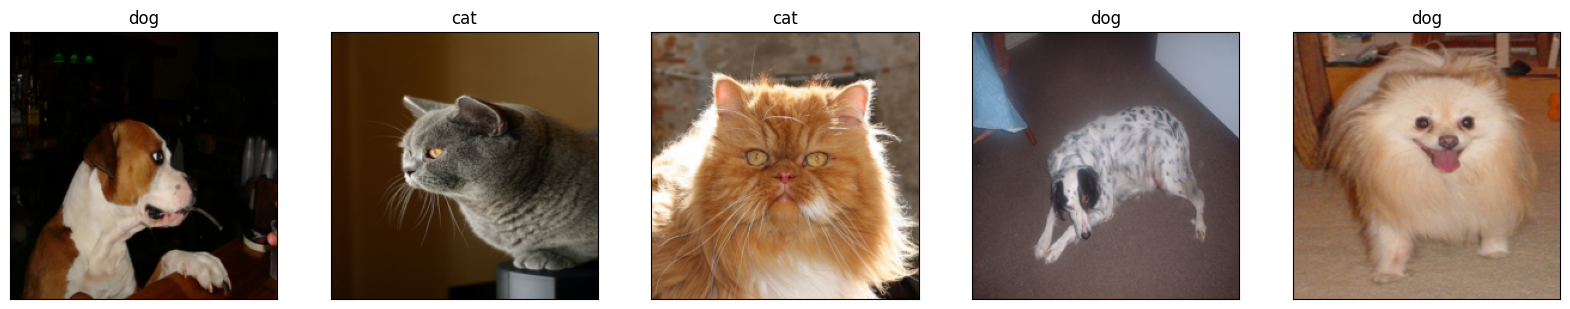

In [7]:
#view_n_random_image(fulldataset_trainval, fullClasses)
#view_n_random_image(dogdataset_trainval, fullClasses)
# view_n_random_image(coddataset_trainval, codclasses)
view_n_random_image(visualize_coddataset_trainval, codclasses)

We decided on option 3. We will use the categorize by cat or dog version.


In [8]:
trainset = coddataset_trainval
testset = coddataset_test
classes = codclasses

In [9]:
print("Number of training samples:", len(trainset))
print("Number of test samples:", len(testset))
print("Number of classes:", len(classes))

print("Example of one entry in the training set:", trainset[0])

Number of training samples: 3680
Number of test samples: 3669
Number of classes: 2
Example of one entry in the training set: (tensor([[[-1.5014, -1.4843, -1.5014,  ...,  2.1462,  2.1119,  2.1462],
         [-1.5014, -1.4843, -1.5014,  ...,  2.1975,  2.1633,  2.1633],
         [-1.4843, -1.4843, -1.4672,  ...,  2.2318,  2.2147,  2.2147],
         ...,
         [-2.0323, -2.0152, -2.0152,  ..., -1.0904, -1.1589, -1.1075],
         [-2.0665, -2.0494, -2.0494,  ..., -1.0390, -1.0562, -1.0562],
         [-1.8953, -1.9124, -1.9124,  ..., -1.1247, -1.0733, -1.0048]],

        [[-1.7031, -1.6856, -1.7031,  ...,  2.3235,  2.2885,  2.3060],
         [-1.7031, -1.6856, -1.7031,  ...,  2.3761,  2.3235,  2.3410],
         [-1.7206, -1.7031, -1.6856,  ...,  2.4111,  2.3936,  2.3936],
         ...,
         [-1.8957, -1.8957, -1.8957,  ..., -0.2150, -0.4951, -0.4951],
         [-1.9307, -1.9307, -1.9132,  ..., -0.1625, -0.1800, -0.3375],
         [-1.8081, -1.8256, -1.8256,  ..., -0.4076, -0.2850, -0

In [10]:
batch_size = 100

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)


Hi,

as you can see I decided on the classification between cats and dogs.

The dataset consists of images with the size IMG_SIZE = 244 (This should be the correct size for ResNet. But you can change this if you want) and a label where 0 represents dogs and 1 represent cats.

I have prepared for you trainloader, testloader and the classes list.

I've also disabled everything that is not needed

# 3. Design a CNN

Design a CNN to predict on the dataset. Use a similar architecture like last time, but this time also include [batch normalization](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html) layers. See [here](https://deepai.org/machine-learning-glossary-and-terms/batch-normalization) for a short description.

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.fc1 = nn.Linear(in_features=128 * 28 * 28, out_features=512)  # Adjust the in_features depending on your image size after pooling
        self.out = nn.Linear(in_features=512, out_features=2)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(x.size(0), -1)  # Flatten the tensor for the fully connected layer
        x = F.relu(self.fc1(x))
        x = self.out(x)
        return F.log_softmax(x, dim=1)

# Initialize the network
model = SimpleCNN()
print(model)

SimpleCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=100352, out_features=512, bias=True)
  (out): Linear(in_features=512, out_features=2, bias=True)
)


In [ ]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class SimpleCNN(nn.Module):
#     def __init__(self):
#         super(SimpleCNN, self).__init__()
#         self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
#         self.bn1 = nn.BatchNorm2d(32)
#         self.dropout1 = nn.Dropout2d(0.25)  # Adding dropout
#         self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
#         self.bn2 = nn.BatchNorm2d(64)
#         self.dropout2 = nn.Dropout2d(0.25)  # Adding dropout
#         self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
#         self.bn3 = nn.BatchNorm2d(128)
#         self.dropout3 = nn.Dropout2d(0.25)  # Adding dropout
#         self.fc1 = nn.Linear(in_features=128 * 28 * 28, out_features=512)
#         self.fc_dropout = nn.Dropout(0.5)  # Dropout before the output layer
#         self.out = nn.Linear(in_features=512, out_features=2)

#     def forward(self, x):
#         x = F.relu(self.bn1(self.conv1(x)))
#         x = self.dropout1(x)
#         x = F.max_pool2d(x, kernel_size=2, stride=2)
#         x = F.relu(self.bn2(self.conv2(x)))
#         x = self.dropout2(x)
#         x = F.max_pool2d(x, kernel_size=2, stride=2)
#         x = F.relu(self.bn3(self.conv3(x)))
#         x = self.dropout3(x)
#         x = F.max_pool2d(x, kernel_size=2, stride=2)
#         x = x.view(x.size(0), -1)  # Flatten the tensor for the fully connected layer
#         x = F.relu(self.fc1(x))
#         x = self.fc_dropout(x)
#         x = self.out(x)
#         return F.log_softmax(x, dim=1)

# # Initialize the network
# model = SimpleCNN()
# print(model)

# 4. Train the model and measure the accuracy

Train the model on the dataset and measure the accuracy on hold out test data.

In [12]:
import torch.optim as optim
import time
# Assuming 'model' is an instance of SimpleCNN and has been defined earlier.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [13]:
def train_model(model, trainloader, testloader, criterion, optimizer, num_epochs=10):
    # Evaluate the model on the test set
    evaluate_model(model, testloader)
    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        running_loss = 0.0
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)

        # Print statistics
        epoch_loss = running_loss / len(trainloader.dataset)
        print(f'Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f}')

        # Evaluate the model on the test set
        evaluate_model(model, testloader)

def evaluate_model(model, testloader):
    model.eval()  # Set model to evaluate mode
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy on test set: {accuracy:.2f}%')


In [14]:
# Run the training and evaluation
start_time = time.time()
train_model(model, trainloader, testloader, criterion, optimizer, num_epochs=10)
end_time = time.time()
elapsed_time = end_time - start_time
minutes, seconds = int(elapsed_time // 60), int(elapsed_time % 60)
print(f'Training took {minutes} minutes and {seconds} seconds')
# Evaluate the model
#evaluate_model(model, testloader)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Accuracy on test set: 32.60%
Epoch 1/10 - Loss: 7.3115
Accuracy on test set: 67.70%
Epoch 2/10 - Loss: 0.6125
Accuracy on test set: 67.87%
Epoch 3/10 - Loss: 0.5873
Accuracy on test set: 68.47%
Epoch 4/10 - Loss: 0.5714
Accuracy on test set: 68.66%
Epoch 5/10 - Loss: 0.5534
Accuracy on test set: 70.67%
Epoch 6/10 - Loss: 0.5412
Accuracy on test set: 68.90%
Epoch 7/10 - Loss: 0.5184
Accuracy on test set: 71.05%
Epoch 8/10 - Loss: 0.5024
Accuracy on test set: 72.53%
Epoch 9/10 - Loss: 0.4906
Accuracy on test set: 72.53%
Epoch 10/10 - Loss: 0.4678
Accuracy on test set: 71.00%
Training took 6 minutes and 52 seconds


# 5. Transfer learning

Now use transfer learning to use a pre-trained ResNet18 on the dataset as follows:

### 1. Using ResNet18 as a Fixed Feature Extractor

**Setup the model**

In [15]:
from torchvision import models

# Load the pre-trained ResNet18 model
resnet18 = models.resnet18(pretrained=True)

# Freeze all the parameters in the network
for param in resnet18.parameters():
    param.requires_grad = False

# Replace the final fully connected layer
# ResNet18's original FC layer outputs 1000 classes, we need 2
num_ftrs = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_ftrs, 2)

# Move the model to the GPU if available
resnet18 = resnet18.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 163MB/s]


**Define Loss Function and Optimizer**

In [16]:
# Optimizer for the final layer
optimizer_resnet18_extractor = optim.Adam(resnet18.fc.parameters(), lr=0.001)

# Loss function remains the same
criterion_resnet18 = nn.CrossEntropyLoss()

**Train and Evaluate**

In [17]:
# Train and evaluate the feature extractor

start_time = time.time()
train_model(resnet18, trainloader, testloader, criterion_resnet18, optimizer_resnet18_extractor, num_epochs=10)
end_time = time.time()
elapsed_time = end_time - start_time
minutes, seconds = int(elapsed_time // 60), int(elapsed_time % 60)
print(f'Training took {minutes} minutes and {seconds} seconds')

# Evaluate the model
#evaluate_model(resnet18, testloader)

Accuracy on test set: 30.36%
Epoch 1/10 - Loss: 0.4021
Accuracy on test set: 96.29%
Epoch 2/10 - Loss: 0.1338
Accuracy on test set: 97.38%
Epoch 3/10 - Loss: 0.0994
Accuracy on test set: 97.33%
Epoch 4/10 - Loss: 0.0940
Accuracy on test set: 97.60%
Epoch 5/10 - Loss: 0.0752
Accuracy on test set: 97.90%
Epoch 6/10 - Loss: 0.0689
Accuracy on test set: 97.87%
Epoch 7/10 - Loss: 0.0582
Accuracy on test set: 97.77%
Epoch 8/10 - Loss: 0.0521
Accuracy on test set: 98.28%
Epoch 9/10 - Loss: 0.0580
Accuracy on test set: 98.34%
Epoch 10/10 - Loss: 0.0465
Accuracy on test set: 98.31%
Training took 6 minutes and 45 seconds
Accuracy on test set: 98.31%


### 2. ResNet18 finetuned on the training data (remember to adapt the learning rate).

**Unfreeze Layers**

In [18]:
# Unfreeze all the layers
for param in resnet18.parameters():
    param.requires_grad = True

# It's often beneficial to use a lower learning rate for fine-tuning
optimizer_resnet18_finetune = optim.Adam(resnet18.parameters(), lr=0.0001)

**Train and Evaluate**

In [19]:
# Train and evaluate the fully fine-tuned model
start_time = time.time()
train_model(resnet18, trainloader, testloader, criterion_resnet18, optimizer_resnet18_finetune, num_epochs=10)
end_time = time.time()
elapsed_time = end_time - start_time
minutes, seconds = int(elapsed_time // 60), int(elapsed_time % 60)
print(f'Training took {minutes} minutes and {seconds} seconds')

# Evaluate the model
#evaluate_model(resnet18, testloader)


Accuracy on test set: 98.31%
Epoch 1/10 - Loss: 0.0375
Accuracy on test set: 98.23%
Epoch 2/10 - Loss: 0.0035
Accuracy on test set: 99.10%
Epoch 3/10 - Loss: 0.0007
Accuracy on test set: 99.21%
Epoch 4/10 - Loss: 0.0003
Accuracy on test set: 99.26%
Epoch 5/10 - Loss: 0.0002
Accuracy on test set: 99.29%
Epoch 6/10 - Loss: 0.0001
Accuracy on test set: 99.16%
Epoch 7/10 - Loss: 0.0002
Accuracy on test set: 99.13%
Epoch 8/10 - Loss: 0.0002
Accuracy on test set: 99.18%
Epoch 9/10 - Loss: 0.0001
Accuracy on test set: 99.16%
Epoch 10/10 - Loss: 0.0001
Accuracy on test set: 99.32%
Training took 7 minutes and 7 seconds


In [ ]:
# delete old models from memory
del model
del resnet18

## EfficientNet_B5

In [20]:
%pip install efficientnet_pytorch

  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached 

 **EfficientNet_B5 as a feature extractor**

In [ ]:
IMG_SIZE = 456 # input size of EfficientNet_B5

In [ ]:
# Transformation for training
train_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),  # Resize images
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Transformation for visualization
visualize_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE))  # Only resize images
])

In [ ]:
coddataset_trainval = datasets.OxfordIIITPet(root='./data', split='trainval', target_types='category', download=True,
                                  transform=train_transform, target_transform=lambda x: 0 if x in dogClasses else 1)
coddataset_test = datasets.OxfordIIITPet(root='./data', split='test', target_types='category', download=True,
                                 transform=train_transform, target_transform=lambda x: 0 if x in dogClasses else 1)
visualize_coddataset_trainval = datasets.OxfordIIITPet(root='./data', split='trainval', target_types='category', download=True,
                                            transform=visualize_transform, target_transform=lambda x: 0 if x in dogClasses else 1)
codclasses = ['dog', 'cat']

#Print the dataset and number of samples in train and test
print("Train dataset:", coddataset_trainval)
print("Test dataset:", coddataset_test)


100%|██████████| 791918971/791918971 [00:26<00:00, 29967579.17it/s]


Extracting data/oxford-iiit-pet/images.tar.gz to data/oxford-iiit-pet


100%|██████████| 19173078/19173078 [00:01<00:00, 15239728.90it/s]


Extracting data/oxford-iiit-pet/annotations.tar.gz to data/oxford-iiit-pet
Train dataset: Dataset OxfordIIITPet
    Number of datapoints: 3680
    Root location: ./data
    StandardTransform
Transform: Compose(
               Resize(size=(456, 456), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
Target transform: <function <lambda> at 0x7a20da994af0>
Test dataset: Dataset OxfordIIITPet
    Number of datapoints: 3669
    Root location: ./data
    StandardTransform
Transform: Compose(
               Resize(size=(456, 456), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
Target transform: <function <lambda> at 0x7a21d4b77eb0>


In [ ]:
trainset = coddataset_trainval
testset = coddataset_test
classes = codclasses

batch_size = 4 # 4  is the size of batch size use for train and test EfficientnetB5, and 100 for other models

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

In [21]:
from efficientnet_pytorch import EfficientNet
# Use EfficientNet_B5 as a feature extractor
efficientnet_b5 = EfficientNet.from_pretrained('efficientnet-b5')

# Freeze all the parameters in the network
for param in efficientnet_b5.parameters():
    param.requires_grad = False

# Replace the final fully connected layer
num_ftrs = efficientnet_b5._fc.in_features
efficientnet_b5._fc = nn.Linear(num_ftrs, 2)

# Move the model to GPU if avialable
efficientnet_b5 = efficientnet_b5.to(device)

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b5-b6417697.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b5-b6417697.pth
100%|██████████| 117M/117M [00:00<00:00, 158MB/s]


Loaded pretrained weights for efficientnet-b5


In [22]:
# Defining the loss function and the optimizer
criterion = nn.CrossEntropyLoss()

#Optimizer
#optimizer = optim.SGD(efficientnet_b5.parameters(), lr=0.001, momentum=0.9)
optimizer_efficientnet_b5_extractor = optim.Adam(efficientnet_b5._fc.parameters(), lr=0.001)


In [ ]:
# Train the model
start_time = time.time()
train_model(efficientnet_b5, trainloader, testloader, criterion, optimizer_efficientnet_b5_extractor, num_epochs=10)
end_time = time.time()
elapsed_time = end_time - start_time
minutes, seconds = int(elapsed_time // 60), int(elapsed_time % 60)
print(f'Training took {minutes} minutes and {seconds} seconds')

# Evaluate the model
evaluate_model(efficientnet_b5, testloader)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 1/10 - Loss: 0.3552
Epoch 2/10 - Loss: 0.1423
Epoch 3/10 - Loss: 0.0976
Epoch 4/10 - Loss: 0.0747
Epoch 5/10 - Loss: 0.0641
Epoch 6/10 - Loss: 0.0587
Epoch 7/10 - Loss: 0.0502
Epoch 8/10 - Loss: 0.0450
Epoch 9/10 - Loss: 0.0404
Epoch 10/10 - Loss: 0.0378
Training took 21 minutes and 15 seconds
Accuracy on test set: 99.26%


In [ ]:
del efficientnet_b5

**EfficientNet_B5 finetuned on the training data**

In [ ]:
# We use batch_size of 4
from efficientnet_pytorch import EfficientNet
# Use EfficientNet_B5 as a feature extractor
efficientnet_b5 = EfficientNet.from_pretrained('efficientnet-b5')

# Unfreeze Layers
for param in efficientnet_b5.parameters():
    param.requires_grad = True

# Replace the final fully connected layer
num_ftrs = efficientnet_b5._fc.in_features
efficientnet_b5._fc = nn.Linear(num_ftrs, 2)

# Move the model to GPU if avialable
efficientnet_b5 = efficientnet_b5.to(device)

# It's often beneficial to use a lower learning rate for fine-tuning
optimizer_efficientnet_b5_finetune = optim.Adam(efficientnet_b5.parameters(), lr=0.0001)


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b5-b6417697.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b5-b6417697.pth
100%|██████████| 117M/117M [00:00<00:00, 190MB/s]


Loaded pretrained weights for efficientnet-b5


In [ ]:
# Train the model
start_time = time.time()
train_model(efficientnet_b5, trainloader, testloader, criterion, optimizer_efficientnet_b5_finetune, num_epochs=10)
end_time = time.time()
elapsed_time = end_time - start_time
minutes, seconds = int(elapsed_time // 60), int(elapsed_time % 60)
print(f'Training took {minutes} minutes and {seconds} seconds')

# Evaluate the model
evaluate_model(efficientnet_b5, testloader)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 1/10 - Loss: 0.1105
Epoch 2/10 - Loss: 0.0272
Epoch 3/10 - Loss: 0.0061
Epoch 4/10 - Loss: 0.0103
Epoch 5/10 - Loss: 0.0062
Epoch 6/10 - Loss: 0.0134
Epoch 7/10 - Loss: 0.0083
Epoch 8/10 - Loss: 0.0136
Epoch 9/10 - Loss: 0.0061
Epoch 10/10 - Loss: 0.0048
Training took 66 minutes and 7 seconds
Accuracy on test set: 99.81%


| Model | Accuracy | Training time | Result |
|-----------|-----------|-----------|-----------|
| Self built CNN |    70.97%       |   3min 29s        |    Worst       |
| Resnet 18 (feature extractor)   |   98.26%        |   3min 12s        |        Very good    |
| Resnet 18 Finetuned   |    99.13%       |   3min 35s        |     Very good       |
| EfficientNet_B5 (feature extractor)  |    99.26%       |    21min 15s       |    Very good         |
| EfficientNet_B5 finetuned   |  99.81%         |   66min 7s        |      Best    |

